Tristan J. Hillis <br/>
ID: 1260315 <br/>
Astro 425 | Homework # 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.ticker import AutoMinorLocator

# style changes
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
mpl.rc('lines', linewidth=1.8, color='k')
mpl.rcParams['font.size'] = 14

def ticks(labelsize, major_size, minor_size):
    mpl.rc('xtick', labelsize=labelsize)
    mpl.rc('xtick.major', size=major_size)
    mpl.rc('xtick.minor', size=minor_size)
    mpl.rc('ytick', labelsize=labelsize)
    mpl.rc('ytick.major', size=major_size)
    mpl.rc('ytick.minor', size=minor_size)
    
ticks(15, 10.0, 5)


# Problem 1

Comparing: $$\ddot{a}(t)= \frac{-4\pi G\ a(t)}{3c^2}\left[ \varepsilon(t) - 3P(t) \right] \:\: \&\:\: \dot{a}(t)^2= \frac{8\pi G \ \varepsilon(t) a(t)^2}{3c^2} - kc^2 $$

The first step is to differentiate the second equation to then plug into the first.  Differentiating with respect to t:
$$2\ \dot{a}(t)\ \ddot{a}(t) = \frac{8\pi G\ \dot{\varepsilon}(t)\ a(t)^2}{3c^2} + \frac{16\pi G\ \varepsilon(t)\ a(t)\ \dot{a}(t)}{3c^2} - 0 $$
Simplifying:
$$\ddot{a}(t) = \frac{4\pi G\ \dot{\varepsilon}(t)\ a(t)^2}{3c^2\ \dot{a}(t)} + \frac{8\pi G\ \varepsilon(t)\ a(t)}{3c^2}$$
Plugging the above into the first equation we gives the following:  
$$ \frac{4\pi G\ \dot{\varepsilon}(t)\ a(t)^2}{3c^2\ \dot{a}(t)} + \frac{8\pi G\ \varepsilon(t)\ a(t)}{3c^2} = -\frac{4\pi G}{3c^2}a(t)\ \varepsilon(t) + \frac{4\pi G}{3c^2}a(t)\ 3P(t) $$
After many cancellations we get simply:
$$\frac{\dot{\varepsilon}(t)\ a(t)}{\dot{a}(t)} + 2\varepsilon(t) = -\varepsilon(t) + 3P(t)$$
After multiplying through by $\frac{\dot{a}(t)}{a(t)}$ and rearranging we get the answer:
$$ \boxed{\dot{\varepsilon}(t) + \frac{3\dot{a}(t)}{a(t)}\left( \varepsilon(t) + P(t) \right)\ } $$

# Problem 2

We can find comoving distance with the following integral:
$$r = \int \frac{c dt}{a} = \int_0^z \frac{c dz}{H(z)} $$

I then define some general function for $H(z)$ which I then put into the above equation and numerically integrate over z using scipy.integrate's quadurature method. 

As for finding the age of the universe we know the following:
$$\frac{dz}{dt}= \frac{H(z)}{a(t)} $$ 
This is just a seperable differential equation that becomes:
$$t_0 - t_e = \int_0^z \frac{dz}{\left(1 + z\right)H(z) } $$
The $a(t)$ was replaced with $a(t) = \frac{1}{1 + z}$
The LHS is the look back time so the beginning of the universe would be seen as some large number rather than 0.  The RHS can be numerically integrated similarly as the comoving distance was.

See below graphs that contain the different universe models.

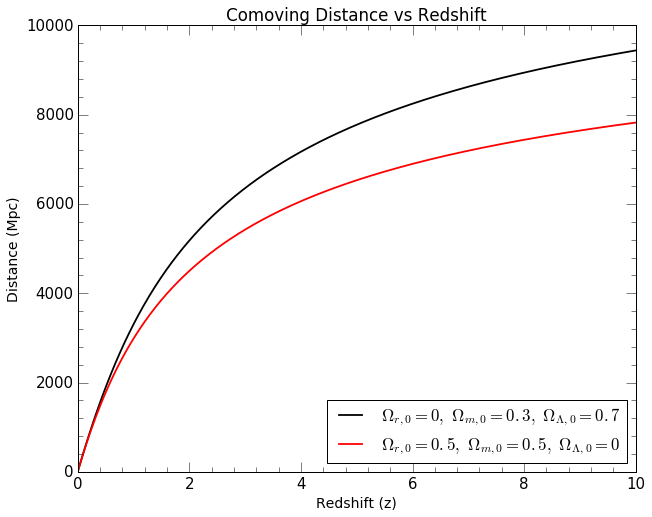

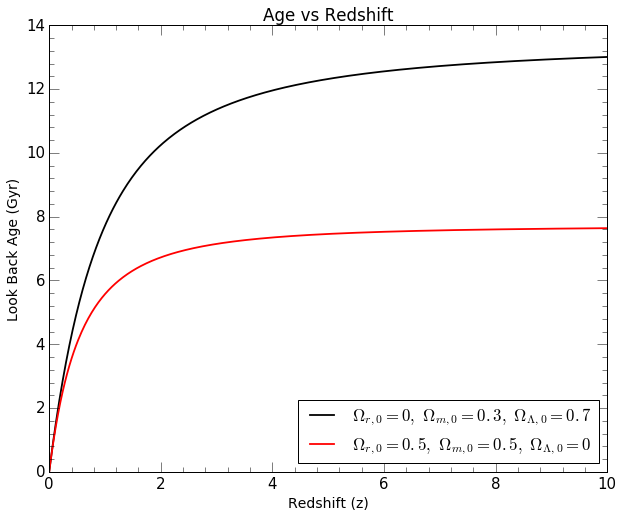

In [2]:
# Problem 2 Code

H_s = 2.2683e-18 # hubble constant in s^-1
H_gyr = 0.07154 # hubble constant in Gyr^-1

# H(z) equation
def H_z(H, omega_r, omega_m, omega_l, omega_o, z):
    return H * np.sqrt(omega_r * (1.0 + z) ** 4 + omega_m * (1.0 + z) ** 3 + omega_l + (1.0 - omega_o) * (1.0 + z) * 2)

#### part a and b

# finding comoving distance
model_a = lambda z: 299792458.0 / H_z(H_s, 0, 0.3, 0.7, 1.0, z) # part a model
model_b = lambda z: 299792458.0 / H_z(H_s, 0.0, 0.5, 0.5, 1.0, z) # part b model
model_a_results = np.array([])
model_b_results = np.array([])
z = np.linspace(0, 10, 500) # redshift from 0 to 10

# integration
for i in z:
    current = quad(model_a, 0, i)
    model_a_results = np.append(model_a_results, current[0])
    current = quad(model_b, 0, i)
    model_b_results = np.append(model_b_results, current[0])

model_a_results = model_a_results * 3.24e-23 # convert from meters to Mpc
model_b_results = model_b_results * 3.24e-23  # convert from meters to Mpc


plt.figure(1)
plt.plot(z, model_a_results, color='k', label=r"$\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, model_b_results, color='r', label=r"$\Omega_{r,0}=0.5,\ \Omega_{m,0}=0.5,\ \Omega_{\Lambda,0}=0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Distance (Mpc)")
plt.title("Comoving Distance vs Redshift")
plt.legend(loc=4)

# set minor ticks
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))

# finding age of the universe

model_a_time = lambda z: 1.0 /  ((1.0 + z) * H_z(H_gyr, 0, 0.3, 0.7, 1.0, z))
model_b_time = lambda z: 1.0 /  ((1.0 + z) * H_z(H_gyr, 0.5, 0.5, 0, 1.0, z)) 
model_a_time_results = np.array([])
model_b_time_results = np.array([])

# integration
for i in z:
    current = quad(model_a_time, 0, i)
    model_a_time_results = np.append(model_a_time_results, current[0])
    current = quad(model_b_time, 0, i)
    model_b_time_results = np.append(model_b_time_results, current[0])
   
plt.figure(2)
plt.plot(z, model_a_time_results, color='k', label=r"$\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, model_b_time_results, color='r', label=r"$\Omega_{r,0}=0.5,\ \Omega_{m,0}=0.5,\ \Omega_{\Lambda,0}=0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Look Back Age (Gyr)")
plt.title("Age vs Redshift")
plt.legend(loc=4)

# set minor ticks
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))



# Problem 3

We can determine the age of benchmark universe by integrating the age of the universe over a large range in redshift.  This age of the benchmark is found to be 13.45961 Gyr, approximately.

We have a new model universe where it is open and only matter has a contribution, i.e. $\Omega_{r,0}=0$ and $\Omega_{\Lambda,0}=0$.  I also am taking $\Omega_{0} = \Omega_{m,0}$, because it is an open universe so the curvature term needs to be negative.  By varying these parameters we can create a simple while loop that stops when the matter density reaches its optimum value.  From my code I find that I reach an age of 13.4595 Gyr and that $\boxed{ \Omega_{m,0} = 0.0496 }$.  See output of code for results also.

In [4]:
# problem 3 code
age = quad(model_a_time, 0, 100)[0]

resolution = 0.00001
matter_density = 0.0
model_c_time = lambda z: 1.0 / ((1.0 + z) * H_z(H_gyr, 0.0, matter_density, 0.0, matter_density, z))
model_c_age = quad(model_c_time, 0, 10000)[0]

while(model_c_age >= age):
    matter_density += resolution
    model_c_time = lambda z: 1.0 / ((1.0 + z) * H_z(H_gyr, 0.0, matter_density, 0.0, matter_density, z))
    model_c_age = quad(model_c_time, 0, 10000)[0]



print "Age of benchmark universe:",age # in Gyr
print "Age of matter only open universe:",model_c_age # in Gyr
print "Optimized matter density parameter:",matter_density


Age of benchmark universe: 13.4596065514
Age of matter only open universe: 13.4593600945
Optimized matter density parameter: 0.04963
